# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [4]:
#Your code here
for column in df.columns:
    df = df.rename(columns={f'{column}' : f'{column.lower()}'})
print(df.columns)

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')


# Change the Index to be the Line Names

In [5]:
#Your code here
df.set_index('linename', inplace=True)
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [6]:
# Your code here
df.reset_index(inplace=True)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [7]:
# Your code here
def count_lines(lines):
    line_count = len(lines)
    return line_count
df['num_lines'] = df['linename'].map(count_lines)
df.sort_values(by=['num_lines'], ascending=False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name.

In [8]:
def clean(col_name):
    cleaned = col_name.title().strip()
    return cleaned

In [9]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
#Checking the output, we can see the results.
df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries', 'Exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

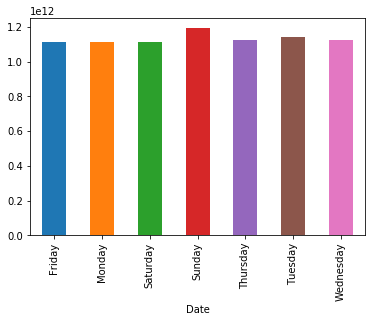

In [18]:
#Your code here
# df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y').map(lambda x: x.day_name())
df.groupby('Date').Entries.sum().plot.bar()

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [26]:
#Your code here

traffic_by_day = df.groupby('Date').Entries.sum()
weekday_traffic = sum([traffic_by_day['Monday'], traffic_by_day['Tuesday'], 
                      traffic_by_day['Wednesday'], traffic_by_day['Thursday'],
                      traffic_by_day['Friday']])/len([traffic_by_day['Monday'], traffic_by_day['Tuesday'], 
                      traffic_by_day['Wednesday'], traffic_by_day['Thursday'],
                      traffic_by_day['Friday']])
weekend_traffic = sum([traffic_by_day['Saturday'], traffic_by_day['Sunday']])/len([traffic_by_day['Saturday'], traffic_by_day['Sunday']])
if weekday_traffic > weekend_traffic:
    print(f'Traffic is {round(((weekday_traffic / weekend_traffic - 1) * 100), 2)}% higher on weekdays')
elif weekday_traffic < weekend_traffic:
    print(f'Traffic is {round(((weekend_traffic / weekday_traffic - 1) * 100), 2)}% higher on weekends')
else:
    print('There is the same amount of traffic on weekdays and weekends.')

Traffic is 2.77% higher on weekends


# Drop a couple of columns

In [27]:
# Your code here
df.drop(['C/A', 'Unit', 'Scp', 'Station', 'Division', 'Time',
       'Desc'], axis=1)

,Linename,Date,Entries,Exits,Num_Lines
0,NQR456W,Saturday,6736067,2283184,7
1,NQR456W,Saturday,6736087,2283188,7
2,NQR456W,Saturday,6736105,2283229,7
3,NQR456W,Saturday,6736180,2283314,7
4,NQR456W,Saturday,6736349,2283384,7
5,NQR456W,Saturday,6736562,2283425,7
6,NQR456W,Sunday,6736683,2283460,7
7,NQR456W,Sunday,6736696,2283461,7
8,NQR456W,Sunday,6736705,2283483,7
9,NQR456W,Sunday,6736746,2283524,7
